# Лабораторная работа №7

### Задача Коши для обыкновенных дифференциальных уравнений

*Нашей целью является обзор основных численных методов решения задачи Коши

$y^\prime(x) = f(x, y(x)), x ∈ (a, b)$

$y (a) = y^0 $,

где $y (x) ≡ (y_1(x), y_2(x),..., y_s(x)), y^0$ - заданный начальный вектор.

При численном решении задачи $(1)$ ищется последовательность векторов $({y_n})^N_{n=0}$, являющихся приближениями для значений решения ${y(x_n)}^N_n=0$ на множестве точек сетки $ω_N ≡ (x_i: x_{i+1} = x_i + h_i$, $i = \overline{0,N−1}$, $x0 = a$, $x_N = b$), где $h_i > 0$ - шаг сетки. В практике используются разнообразные сетки. Мы ограничимся рассмотрением методов с равномерными сетками, т.е. сетками с постоянным шагом $h_i ≡ h$.

Основное предположение относительно задачи $(1)$, которое мы примем, состоит в непрерывности правой части дифференциального уравнения (вектор-функции $f (x, y))$ по совокупности переменных в $(a, b) × R_s$ и глобального (равномерного относительно $x$) условия Липшица по $y$:

$||f(x, y_1) − f(x, y_2)|| ≤ L||y^1 − y^2||$,


где $L$ - постоянная Липшица. В этих условиях решение задачи Коши $(1)$ существует и единственно при любом начальном векторе $y_0$. Заметим, что реализация конкретного численного метода и, в особенности, его обоснование требуют обычно более сильных ограничений на параметры задачи. Не оговаривая дополнительно, мы предполагаем всякий раз выполнение этих условий, ограничиваясь в основном изложением формальной схемы метода.

In [1]:
import numpy as np
from math import log, exp,sin,cos,sqrt
from scipy import *
from scipy.linalg import *
from sympy import *
init_printing()
import matplotlib.pyplot as plt
import pylab
% matplotlib inline

## Метод разложения в ряд Тейлора

Простейшим способом построения приближенного решения в точке $x_{n+1}$
сетки $ω_N$ является способ, основанный на разложении решения в ряд
Тейлора в предыдущей точке сетки $x_n$ по степеням шага $h$:


$y(x_{n+1}) = y(x_n) + h \Delta(x_n, y_n, h)$, 


$\Delta (x, y, h) ≡ y^\prime(x) + h/2\cdot y^{\prime\prime}(x) + h/(2\cdot 3!) y^{\prime\prime\prime}(x) + ... $


Взяв вместо этого ряда конечный его отрезок


$ϕ_p(x, y, h) ≡ y^\prime(x) + h/2\cdot y^{\prime\prime}(x) + . . . + h^{p−1}/p!\cdot y^{(p)}(x)$


И заменяя в нем производные $y^{(k)}(x)$ получаем последовательность приближений
$y_{n+1} = y_n + h\cdot ϕ_p(x_n, y_n, h), n = 0, 1, 2, . . . .$ 


Алгоритм типа не требуют вычисления дополнительных началь-
ных условий и позволяют легко менять шаг интегрирования. Примени-
мость данных методов ограничена теми задачами, для которых легко
вычисляются частные производные высоких порядков функции $f(x, y)$.



Решим диф-е уравнение  $ y^{\prime\prime} + y^\prime -4y = x\cdot exp(-x) $, с начальными условиями  $ y(0)=1$, $y^\prime(0)=0 $, $x∈[0,2]$, с относительной точностью $0.01$

In [3]:
def f(x,y1,y2):
    z=y2
    r=4*y1-y2+x*exp(-x)
    return z,r
x=Symbol('x')
y1=Symbol('y1')
y2=Symbol('y2')

In [38]:
def F(x00,y0,y01,h):
    n=0
    n1=np.zeros([2,1]) # это будет массив со значаниями y' 
    A=np.zeros([2,1])  # это будет массив со значаниями f'по х 
    A2=np.zeros([2,1])# это будет массив со значаниями f'' по х x 
    while True:
        x0=x00 #начальная точка  по x
        n0=np.array([[y0],[y01]]) # массив с начальными условиями
        n=n+1 # счётчик
        X=[x0] # список с начальным х
        Y=[y0] # список с y0
        Y1=[y01] # список с y'(0)
        S=[y0] # список с y0 в дальнейше будет использоваться
        j=1 # в дальнейше будет использоваться
        # a,b,c,d компонетны матрицы якоби. матрица постоянная. компоненты считаются через зиспольное дифференцирование
        a=diff(f(x,y1,y2)[0],y1).evalf(subs={x:x0,y1:n0[0][0],y2:n0[1][0]})
        b=diff(f(x,y1,y2)[0],y2).evalf(subs={x:x0,y1:n0[0][0],y2:n0[1][0]})
        c=diff(f(x,y1,y2)[1],y1).evalf(subs={x:x0,y1:n0[0][0],y2:n0[1][0]})
        d=diff(f(x,y1,y2)[1],y2).evalf(subs={x:x0,y1:n0[0][0],y2:n0[1][0]})
        M=np.array([[a,b],[c,d]]) # матрица якоби
        while x0>=0 and x0<=(2-h): # цикл по сетки. шагаем от начального х в следующую и пересчитываем у и у'
            A[1][0]=diff(f(x,y1,y2)[1],x).evalf(subs={x:x0,y1:n0[0][0],y2:n0[1][0]}) # считается производная по х
            A2[1][0]=diff(f(x,y1,y2)[1],x,x).evalf(subs={x:x0,y1:n0[0][0],y2:n0[1][0]}) # считается вторая производная по х,х
            for i in range(2):
                e=f(x,y1,y2)[i].evalf(subs={x:x0,y1:n0[0][0],y2:n0[1][0]}) # значаниями y' = f(в начальной точке)
                n1[i]=e # получили массив со значаниями y'
            n2=A+dot(M,n1) # создаются слагаеммые для окончальтельной флрмулы
            n3=A2+dot(M,A) 
            nn=n0+h*n1+0.5*n2*h**2+h**3/3*n3 # окончательная формула
            n0=nn # двинули начальную точку
            x0=x0+h # шагнули по х
            X.append(x0) # добавили х в список . для графика
            Y.append(nn[0][0]) # добавили y в список . для графика
            j=j+1
            if j%2!=0: # проверка на нечётность
                S.append(nn[0][0]) # запомнили значени у на нечётном шаге
                
        h=h*0.5  # подробили шаг  
        S=np.array(S,dtype=np.double) # из списка сделали массив
        if n!=1: # после первой итерации идёт проверка на выход из основного цикла
            Yp= np.array(Yp,dtype=np.double) # из списка сделали массив
            if abs (norm(S-Yp)/norm(Yp))<0.001: # проверка
                break
        Yp=Y # запомнили значения всех y на предыдущем шаге
    return X,Y
Ca,Da=F(0,1,0,1)

In [39]:
print (len(Ca))

129


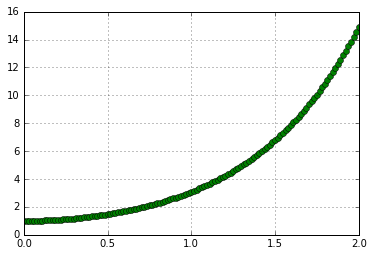

In [42]:
#график решения численного и истиннго
def Fx(x):
    z=0.649999997331716*exp(0.5*x*(-1+sqrt(17)))+0.312500002668284*exp(0.5*x*(1-sqrt(17)))-x/4*exp(-x)+exp(-x)/16
    #z=1/34*exp(-0.5*x*(1+sqrt(17)))*((17+sqrt(17))*exp(sqrt(17)*x)+17-sqrt(17)) #решени однородного уравнения. хорошо совпадает.
    return z               
xnew=np.linspace(0,2,129)
ynew=[Fx(i) for i in xnew]
plt.plot(xnew,ynew,Ca,Da,'o')
plt.grid(True)
plt.show()

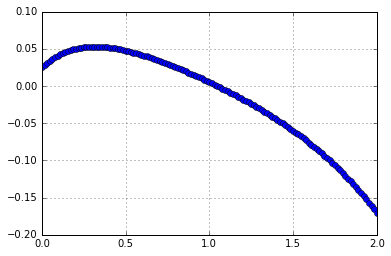

In [43]:
O=[]
for i in range (129):
    O.append(ynew[i]-Da[i])
#print (O)
plt.plot(xnew,O,'o')
plt.grid(True)
plt.show()